#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os  # cv2 : OpenCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = ',')
    plt.plot(history['val_loss'], label='val_err', marker = ',')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [ ]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

* 이미지 확인하기

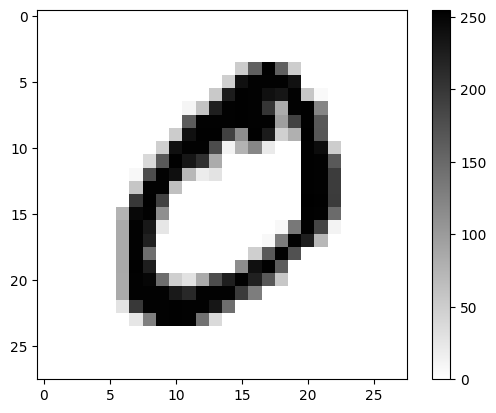

In [ ]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

* 이미지를 픽셀 값(배열 값)으로 확인하기

In [ ]:
# numpy array 화면 출력시 문자열 길이 조정
np.set_printoptions(linewidth=500)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60, 224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253, 253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,  84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,  28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,   0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,   0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,   0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,   0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85, 178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252, 252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252, 233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

* 여러 이미지 확인하기

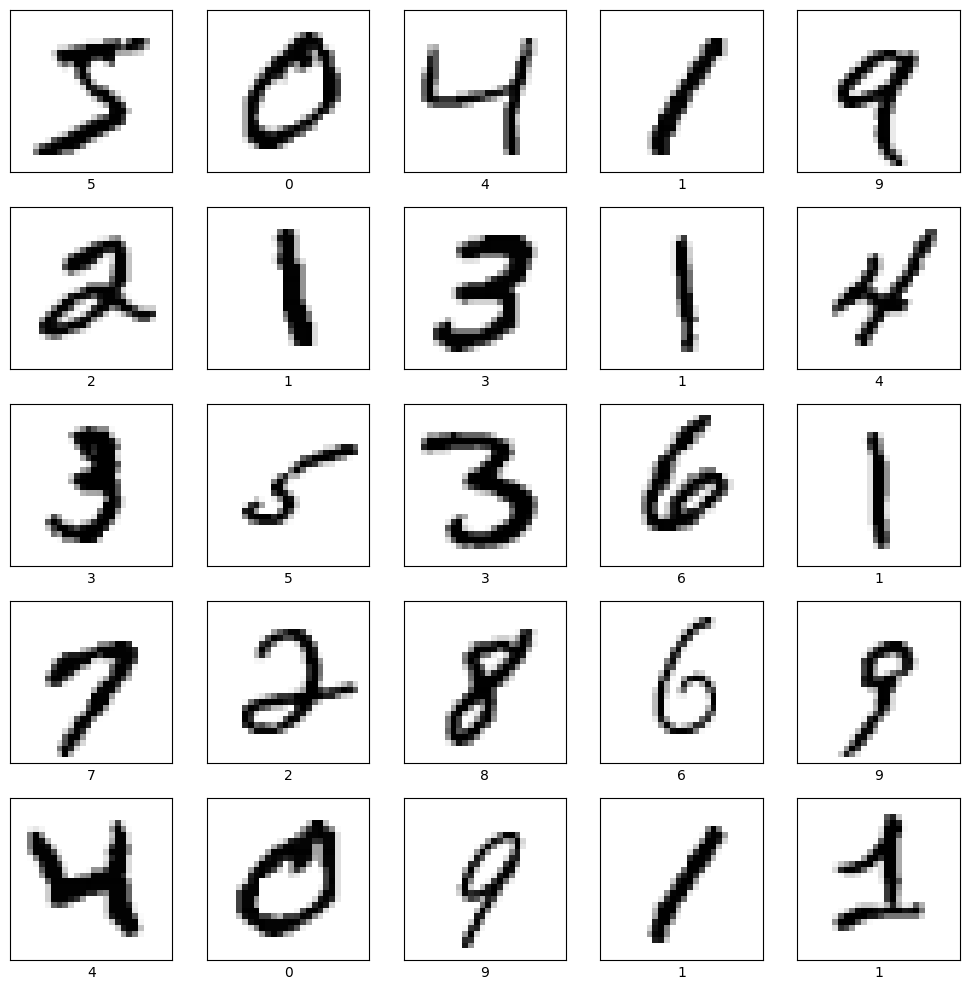

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [ ]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1) ==> ( 건수, 세로픽셀수, 가로픽셀수, 채널(칼러3, 흑백1))
    * x_val.shape : (10000, 28, 28, 1)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_val 그냥 255로 나누면 됨

In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.CNN 기본 모델링

### (1) 모델 설계
* CNN 모델의 기본 구조
    * Conv2D  : 지역적인 특징 도출
    * MaxPooling : 요약
    * Flatten : 1차원으로 펼치기
    * Dense : Output Layer

In [ ]:
clear_session()

model = Sequential([Input(shape = (28, 28, 1)), # 예측 단위 shape , 이미지 한장 단위
                    Conv2D(16, kernel_size = 3, padding='same', activation='relu'),  # strides = 1(기본값,1)
                    # 필터(커널) 개수 16개 ,
                    # 커널사이즈= 3x3 ,
                    # strides = 1(기본값,1) 한칸씩 이동
                    # padding = 'same' : size를 유지하도록 초과된 곳에 0을 채워서 계산
                    MaxPooling2D(pool_size = 2 ),             # strides = 2(기본값이 pool_size 동일)
                    # 출력 데이터의 크기를 줄이거나 특정 데이터 강조용으로 사용
                    # pool_size =2 : 2x2 사이즈로 풀링 사이즈 압축
                    # strides : 생략하면 pool_size와 동일
                    Flatten(), # 1차원으로 펼치고 Dense layer에 입력
                    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          31,370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,530 (123.16 KB)

 Trainable params: 31,530 (123.16 KB)

 Non-trainable params: 0 (0.00 B)

### (2) 학습

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5258 - val_loss: 0.1275
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1094 - val_loss: 0.0909
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0743 - val_loss: 0.0810
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0619 - val_loss: 0.0778
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0536 - val_loss: 0.0694
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0472 - val_loss: 0.0656
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0396 - val_loss: 0.0684
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0387 - val_loss: 0.0714
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0338 - val_loss: 0.0744
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0290 - val_loss: 0.0705


### (3) 학습결과 그래프

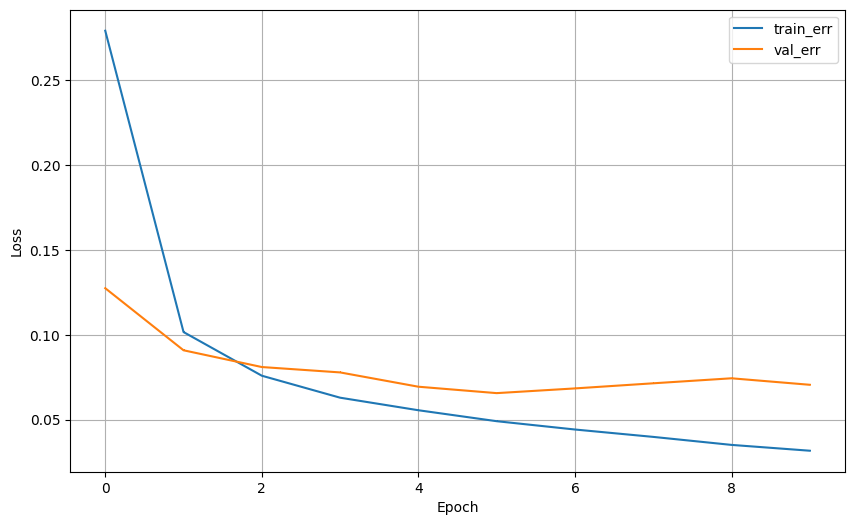

In [ ]:
dl_history_plot(history)

### (4) 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9806
------------------------------------------------------------
[[ 962    0    2    2    0    4    3    1    3    3]
 [   0 1132    2    0    1    0    0    0    0    0]
 [   0   11 1007    4    1    0    1    7    0    1]
 [   0    1    4  991    0    9    0    1    4    0]
 [   0    0    1    0  970    0    3    1    0    7]
 [   2    0    1    5    0  880    3    0    1    0]
 [   4    2    0    0    6    3  939    0    4    0]
 [   0    5   10    2    1    1    0 1005    1    3]
 [   5    2    5    1    3    3    3    4  942    6]
 [   0    3    0    3   11    5    0    9    0  978]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5   

## 5.실습


### (1) 모델1
* 기본 모델링에서 다음을 조정해 봅시다.
    * Flatten 이후 Dense 레이어 추가(노드수 128)

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [70]:
# 1. 모델 설계
clear_session()

model = Sequential([Input(shape = (28, 28, 1)), # 예측 단위 shape , 이미지 한장 단위
                    Conv2D(16, kernel_size = 3, padding='same', activation='relu'),  # strides = 1(기본값,1)
                    MaxPooling2D(pool_size = 2),  # 28x28 >> 14 x14 로 압축할 것이기ㅔ pool_size = 2
                    Flatten(), # 1차원으로 펼치고 Dense layer에 입력
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])


model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,986 (1.54 MB)

 Trainable params: 402,986 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# 2. 학습
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.3250 - val_loss: 0.1480
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0952 - val_loss: 0.1201
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0576 - val_loss: 0.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0490 - val_loss: 0.1063
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0389 - val_loss: 0.1134
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0328 - val_loss: 0.1195
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0295 - val_loss: 0.1215
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0262 - val_loss: 0.1052
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0218 - val_loss: 0.1203
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0167 - val_loss: 0.1394


* 학습결과 그래프

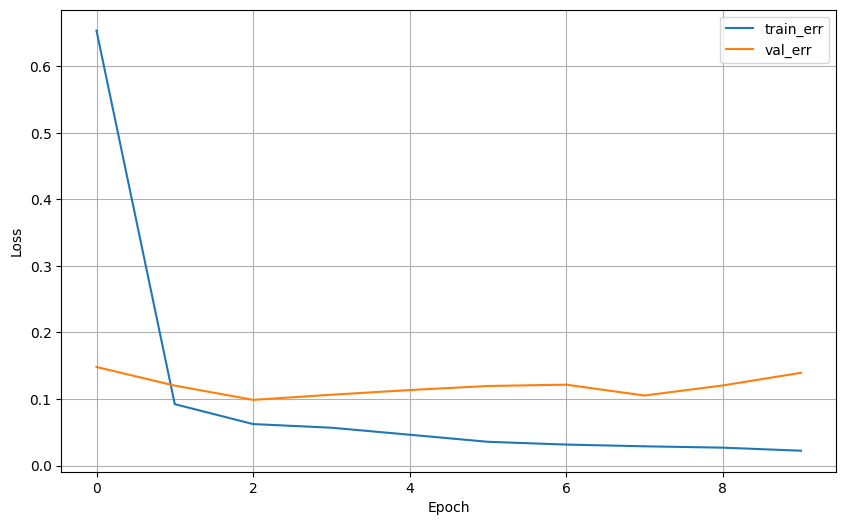

In [72]:
# 3. 학습 결과 그래프
dl_history_plot(history)

* 예측 및 평가

In [73]:
# 4. 예측 및 평가
pred = model.predict(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
pred = pred.argmax(axis=1)
print(accuracy_score(y_val,pred))
print('-'*60)
print(confusion_matrix(y_val, pred))
print('-'*60)
print(classification_report(y_val, pred))


0.9761
------------------------------------------------------------
[[ 974    1    2    0    0    0    1    1    1    0]
 [   3 1109    6    1    2    0    2    6    5    1]
 [   3    1 1015    1    1    0    1    5    5    0]
 [   0    0    6  992    0    5    0    4    1    2]
 [   1    0    1    0  963    0    1    2    0   14]
 [   2    0    0    6    0  877    3    0    3    1]
 [   7    2    2    0    7    4  929    0    7    0]
 [   1    1   10    3    4    0    0  996    1   12]
 [   2    0    9    7    5    3    1    3  934   10]
 [   4    1    3    5    8   10    0    4    2  972]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5   

### (2) 모델2
* 모델1에 이어서 다음을 조정해 봅시다.
    * Convnet의 커널 수를 32로 늘려 봅시다.
    + keras 는 커널개수를 마지막에
      pytorch는 커널 개수를 맨앞에 표현한다
      

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, **32**) | 320       |
| max_pooling2d |  (None, 14, 14, 32) |      0         |
| flatten (Flatten) | (None, 6272)   |           0         |
| dense (Dense) |    (None, 128)   |            802944        |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [57]:
# 1. 모델 설계
clear_session()

model = Sequential([Input(shape = (28, 28, 1)), # 예측 단위 shape , 이미지 한장 단위
                    Conv2D(32, kernel_size = 14, padding='same', activation='relu'),  # strides = 1(기본값,1)

                    MaxPooling2D(pool_size = 2),  # 28x28 >> 14 x14 로 압축할 것이기ㅔ pool_size = 2
                    Flatten(), # 1차원으로 펼치고 Dense layer에 입력
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])


model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           6,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 810,538 (3.09 MB)

 Trainable params: 810,538 (3.09 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# 2. 학습
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.4565 - val_loss: 0.1069
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0824 - val_loss: 0.1127
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0699 - val_loss: 0.1069
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0583 - val_loss: 0.1092
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0531 - val_loss: 0.1234
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0488 - val_loss: 0.1384
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0408 - val_loss: 0.1772
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0526 - val_loss: 0.1455
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0317 - val_loss: 0.1802
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0581 - val_loss: 0.2030


* 학습결과 그래프

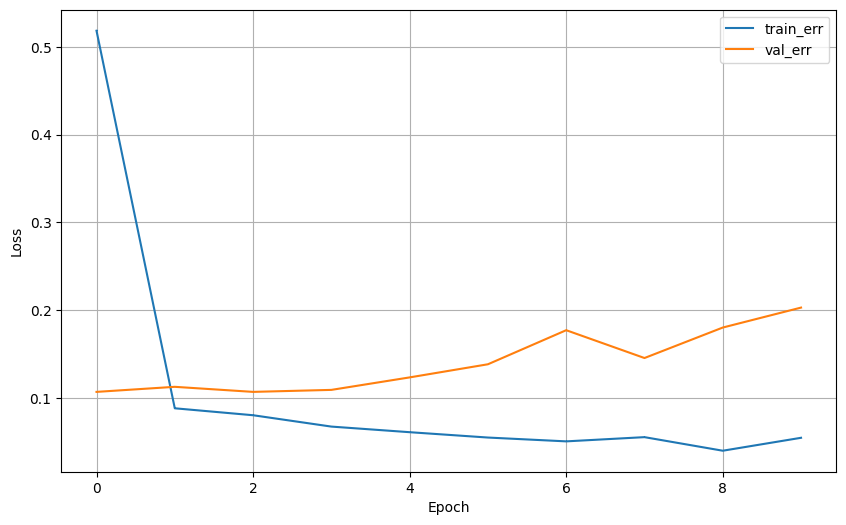

In [59]:
# 3. 학습 결과 그래프
dl_history_plot(history)

* 예측 및 평가

In [60]:
# 4. 예측 및 평가
pred = model.predict(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [61]:
pred = pred.argmax(axis=1)
print(accuracy_score(y_val,pred))
print('-'*60)
print(confusion_matrix(y_val, pred))
print('-'*60)
print(classification_report(y_val, pred))

0.9759
------------------------------------------------------------
[[ 959    0    4    0    1    1    2    2    2    9]
 [   0 1111    3    1    5    1    0    2    9    3]
 [   1    1 1008    0    0    0    0   16    6    0]
 [   0    0    2  991    0    3    0    5    1    8]
 [   0    1    3    1  965    0    0    3    2    7]
 [   1    0    0   11    0  875    2    0    1    2]
 [   7    2    1    1   10    5  922    0   10    0]
 [   0    0    3    4    1    0    0 1018    1    1]
 [   4    0    2    8    0    9    0    6  943    2]
 [   0    1    2    3   16    4    0   11    5  967]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5   

### (3) 모델3
* 모델2에 이어서, 아래 그림을 보고, 빠진 부분을 추가하시오.

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [89]:
# 1. 모델 설계
clear_session()

model = Sequential([Input(shape = (28, 28, 1)), # 예측 단위 shape , 이미지 한장 단위

                    Conv2D(32, kernel_size = (3,3), padding='same', activation='relu'),  # strides = 1(기본값,1)
                    MaxPooling2D(pool_size = 2),  # 28x28 >> 14 x14 로 압축할 것이기ㅔ pool_size = 2

                    Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),  # strides = 1(기본값,1)
                    MaxPooling2D(pool_size = 2),
                    Flatten(), # 1차원으로 펼치고 Dense layer에 입력
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])


model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# 2. 학습
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3046 - val_loss: 0.0704
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0655 - val_loss: 0.0804
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0492 - val_loss: 0.0829
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0397 - val_loss: 0.0538
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0306 - val_loss: 0.0669
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0246 - val_loss: 0.0650
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0239 - val_loss: 0.0755
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0244 - val_loss: 0.0659
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0188 - val_loss: 0.0606
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0156 - val_loss: 0.0799


* 학습결과 그래프

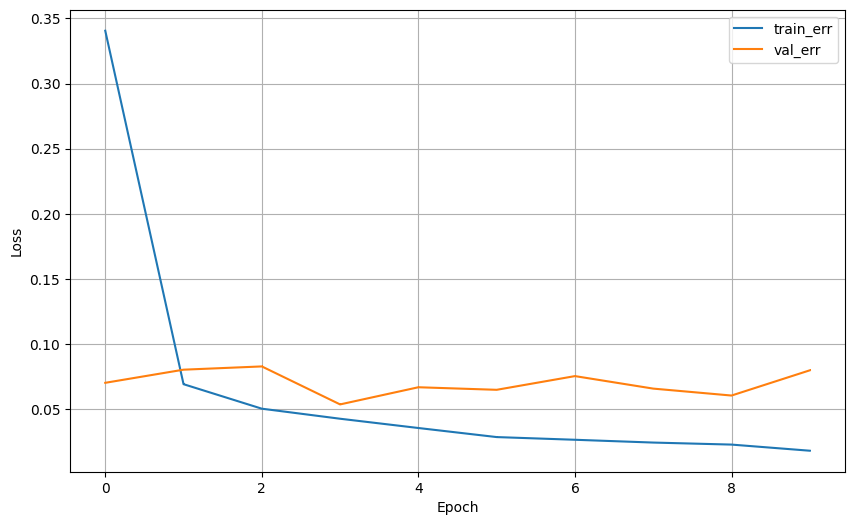

In [91]:
# 3. 학습 결과 그래프
dl_history_plot(history)

* 예측 및 평가

In [92]:
# 4. 예측 및 평가
pred = model.predict(x_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [93]:
pred = pred.argmax(axis=1)
print(accuracy_score(y_val,pred))
print('-'*60)
print(confusion_matrix(y_val, pred))
print('-'*60)
print(classification_report(y_val, pred))

0.9871
------------------------------------------------------------
[[ 973    0    0    0    0    0    5    0    1    1]
 [   0 1125    1    3    3    1    2    0    0    0]
 [   5    0 1014    2    1    0    0    8    1    1]
 [   0    0    0 1001    0    5    0    3    1    0]
 [   0    0    0    0  967    1    4    3    0    7]
 [   2    0    0    6    0  881    1    0    0    2]
 [   2    2    0    0    0    8  946    0    0    0]
 [   0    3    3    0    0    1    0 1017    1    3]
 [   3    1    0    4    4    2    2    2  952    4]
 [   0    0    0    2    6    3    0    2    1  995]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5   

## 6.틀린그림 찾아보기
* 모델3의 결과에서 틀린 그림을 살펴 봅시다.
* 아래코드는 이해하기보다는 그냥 사용하기 바랍니다.

In [ ]:
idx = (y_val != pred)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

(254, 28, 28)


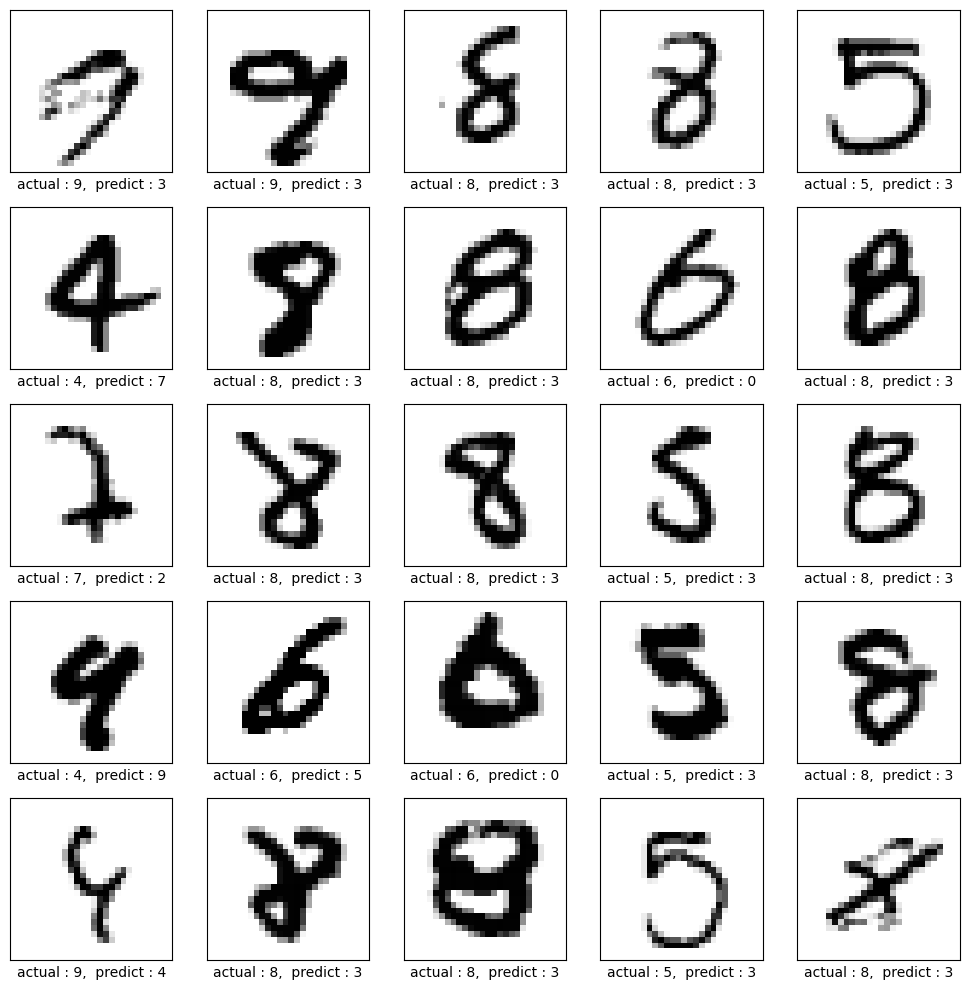

In [ ]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {y_temp[i]},  predict : {p_temp[i]}')
plt.tight_layout()
plt.show()

## 7.진짜 손글씨로 예측해 봅시다.

* 이미지 처리를 위한 라이브러리와 함수 불러오기

In [75]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 그린 손글씨를 업로드 합니다.

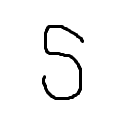

(140, 140)


In [76]:
# 파일 열기
img = cv2.imread('test4.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

* 이미지 크기를 28, 28, 1 로 맞추기

In [77]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


In [78]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 167,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 104,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

* 예측하기

In [79]:
x_train.shape

(60000, 28, 28)

In [97]:
# 입력데이터 형식을 갖추기
test_num = img.reshape(1,28,28,1) /255
print(test_num[0].dtype)
test_num = np.array(test_num).reshape(1,28,28,1).astype('float32')
# 예측하기
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(pred_1)

float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[8]
